# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import plotly.express as px


In [19]:
# Load the data
# df = pd.read_csv('sample_botnet_df_v2.csv')
df = pd.read_csv('BoTNeTIoT-L01-v2.csv')
# df = pd.read_csv('BotNeTIoT-L01_label_NoDuplicates.csv')
print(df.columns)

# sample
# df = df.sample(1000)


Index(['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance',
       'H_L0.1_weight', 'H_L0.1_mean', 'H_L0.1_variance', 'HH_L0.1_weight',
       'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_magnitude', 'HH_L0.1_radius',
       'HH_L0.1_covariance', 'HH_L0.1_pcc', 'HH_jit_L0.1_weight',
       'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight',
       'HpHp_L0.1_mean', 'HpHp_L0.1_std', 'HpHp_L0.1_magnitude',
       'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc',
       'Device_Name', 'Attack', 'Attack_subType', 'label'],
      dtype='object')


## Encoding categorical features

In [20]:
# Convert Device name to numerical
le = preprocessing.LabelEncoder()
df['Device_Name'] = le.fit_transform(df['Device_Name'])
df['Attack'] = le.fit_transform(df['Attack'])
df['Attack_subType'] = le.fit_transform(df['Attack_subType'])

print('-'*10, 'DATA TYPES', '-'*10)
print(df.dtypes)
print('\n')

print('Device_Name:', df['Device_Name'].unique())
print('Attack:', df['Attack'].unique())
print('Attack_subType:', df['Attack_subType'].unique())

---------- DATA TYPES ----------
MI_dir_L0.1_weight      float64
MI_dir_L0.1_mean        float64
MI_dir_L0.1_variance    float64
H_L0.1_weight           float64
H_L0.1_mean             float64
H_L0.1_variance         float64
HH_L0.1_weight          float64
HH_L0.1_mean            float64
HH_L0.1_std             float64
HH_L0.1_magnitude       float64
HH_L0.1_radius          float64
HH_L0.1_covariance      float64
HH_L0.1_pcc             float64
HH_jit_L0.1_weight      float64
HH_jit_L0.1_mean        float64
HH_jit_L0.1_variance    float64
HpHp_L0.1_weight        float64
HpHp_L0.1_mean          float64
HpHp_L0.1_std           float64
HpHp_L0.1_magnitude     float64
HpHp_L0.1_radius        float64
HpHp_L0.1_covariance    float64
HpHp_L0.1_pcc           float64
Device_Name               int64
Attack                    int64
Attack_subType            int64
label                     int64
dtype: object


Device_Name: [0 1 2 3 4 5 6 7 8]
Attack: [1 2 0]
Attack_subType: [2 3 4 6 7 1 5 8 0]


# Feature Correlation Analysis

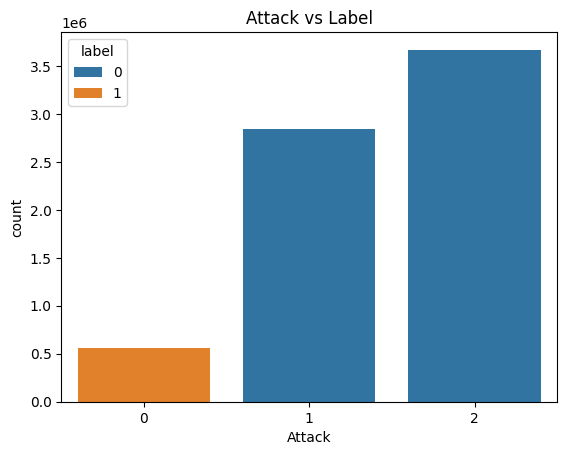

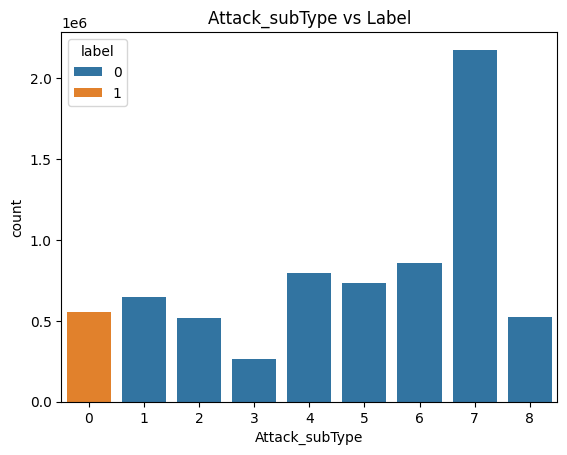

---------- Data Types ----------
MI_dir_L0.1_weight      float64
MI_dir_L0.1_mean        float64
MI_dir_L0.1_variance    float64
H_L0.1_weight           float64
H_L0.1_mean             float64
H_L0.1_variance         float64
HH_L0.1_weight          float64
HH_L0.1_mean            float64
HH_L0.1_std             float64
HH_L0.1_magnitude       float64
HH_L0.1_radius          float64
HH_L0.1_covariance      float64
HH_L0.1_pcc             float64
HH_jit_L0.1_weight      float64
HH_jit_L0.1_mean        float64
HH_jit_L0.1_variance    float64
HpHp_L0.1_weight        float64
HpHp_L0.1_mean          float64
HpHp_L0.1_std           float64
HpHp_L0.1_magnitude     float64
HpHp_L0.1_radius        float64
HpHp_L0.1_covariance    float64
HpHp_L0.1_pcc           float64
Device_Name               int64
label                     int64
dtype: object


In [21]:
# Plot 'Attack' vs 'label'
sns.countplot(x='Attack', hue='label', data=df)
plt.title('Attack vs Label')
plt.show()

# Plot 'Attack_subType' vs 'label'
sns.countplot(x='Attack_subType', hue='label', data=df)
plt.title('Attack_subType vs Label')
plt.show()

# Drop attack and attack subtype
df = df.drop(['Attack', 'Attack_subType'], axis=1)

print('-'*10, 'Data Types', '-'*10)
print(df.dtypes)

# Save the data
df.to_csv('BoTNeTIoT-L01-v2-prepared.csv', index=False)

Attack and Attack_subtype are strongly correlated to the label so they should be dropped as they artificially inflate model performance without generalizing to unseen data.

---------- CORRELATION ANALYSIS ----------
Features dropped due to high correlation (>0.95): ['H_L0.1_weight', 'H_L0.1_mean', 'H_L0.1_variance', 'HH_L0.1_magnitude', 'HH_jit_L0.1_weight', 'HpHp_L0.1_mean', 'HpHp_L0.1_magnitude']


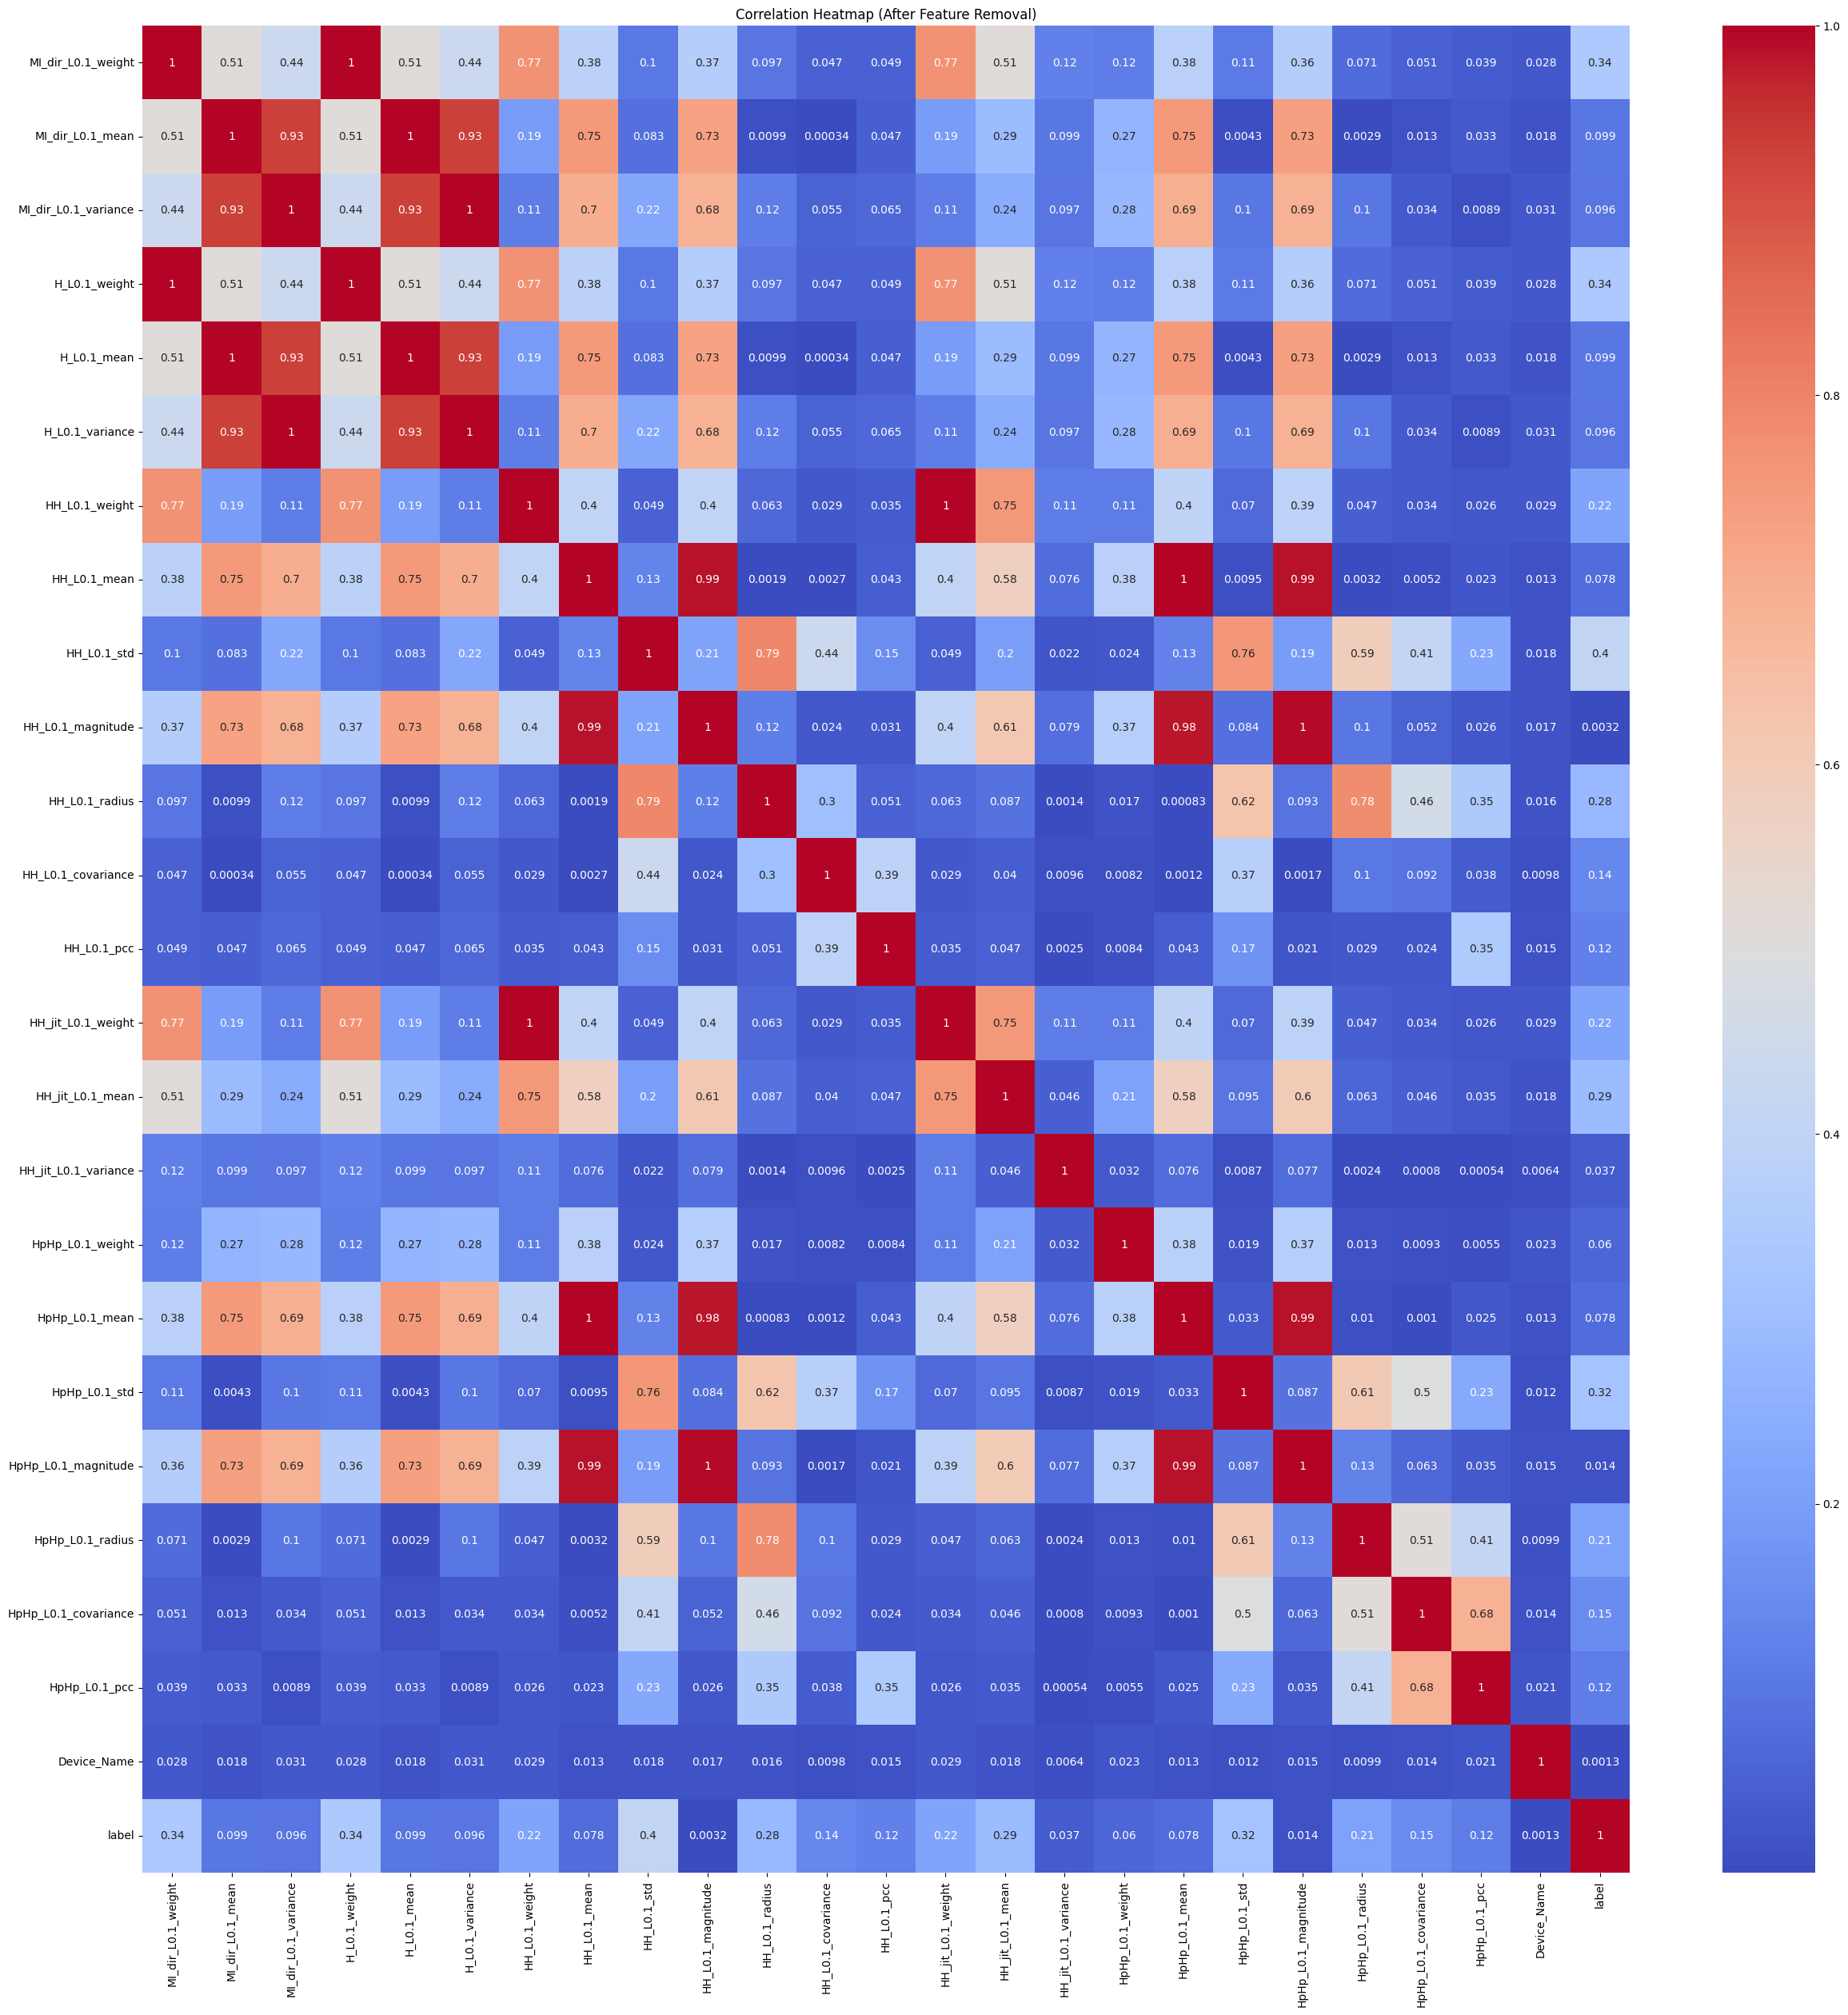

In [30]:
# Read the data
df = pd.read_csv('BoTNeTIoT-L01-v2-prepared.csv')

# Function to drop highly correlated features
def drop_highly_correlated_features(df, threshold=0.95):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    df.drop(columns=to_drop, inplace=True)
    return df, corr_matrix, to_drop

# Drop highly correlated features
df, corr, dropped_features = drop_highly_correlated_features(df)

# Print information about dropped features
print('-'*10, 'CORRELATION ANALYSIS', '-'*10)
print(f"Features dropped due to high correlation (>{0.95}): {dropped_features}")

# Plot heatmap of updated correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap (After Feature Removal)')
plt.show()

Saving the highest correlation pair to later visualize the data distribution

## Feature and Target Selection

Label Feature as Target

0: Malicious behavior (attack)
When the Attack column has values like mirai, gafgyt, and specific subtypes like ack or tcp.

1: Normal behavior
When the Attack and Attack_subType columns indicate Normal.

The label feature serves as the final determination of whether the data corresponds to an attack or normal behavior. This makes it an ideal target variable.

In [31]:
# Define features and target
features = df.drop(columns=['label'])
target = df['label']

print('-'*10, 'FEATURES AND TARGET', '-'*10)
print('Features:', features.columns.tolist())
print('Target:', target.name)

---------- FEATURES AND TARGET ----------
Features: ['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance', 'HH_L0.1_weight', 'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_radius', 'HH_L0.1_covariance', 'HH_L0.1_pcc', 'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight', 'HpHp_L0.1_std', 'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc', 'Device_Name']
Target: label


## Split Dataset

Setting up the dataset for modeling by splitting and scaling the data

In [36]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0, stratify=target)

# Save the split data
print('-' * 10, 'DATA SPLITS', '-' * 10)
print('Training Features Shape:', X_train.shape)
print('Test Features Shape:', X_test.shape)
print('Training Target Shape:', y_train.shape)
print('Test Target Shape:', y_test.shape)

---------- DATA SPLITS ----------
Training Features Shape: (5650084, 17)
Test Features Shape: (1412522, 17)
Training Target Shape: (5650084,)
Test Target Shape: (1412522,)


## Feature Scaling

Since we're making a classification task it's understandable that only the X features get to be scaled. Our target variable is also categorial which me that the scaling of features y are not applicable.
To ensure consistency, the X_test also gets to be scaled.

In [37]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaled data
pd.DataFrame(X_train_scaled, columns=X_train.columns).to_csv('X_train_scaled.csv', index=False)
pd.DataFrame(X_test_scaled, columns=X_test.columns).to_csv('X_test_scaled.csv', index=False)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)